In [1]:
version = "v2.0.220705.1"

In [2]:
# Either of the following is no longer
# necessary for matplotlib in notebooks.
# The import statement has you covered!

# %matplotlib notebook
# %matplotlib inline

In [3]:
# Suppress all warnings only when absolutely necessary
# Warnings are in place for a reason!
import warnings

# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

# Assignment 1 Part 2: Introduction to Supervised Machine Learning
In this assignment you will be using the [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) dataset to create a classifier that can help diagnose patients. We chose this data not only because it provides a good basis for a kNN classification problem, but also because it illustrates one of the built-in datasets that comes with `scikit-learn`.

In [4]:
# Import some necessary libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [5]:
# np.set_printoptions(precision=3)

## Additional imports can be inlcuded here

In [52]:
from sklearn.datasets import load_breast_cancer

In [53]:
# Load the dataset from scikit-learn.

cancer = load_breast_cancer()

In [7]:
# To see a description of the dataset,
# uncomment the following print statement

# print(cancer.DESCR)

The object returned by `load_breast_cancer()` is a scikit-learn `bunch` object, which is similar to a Python dictionary.  
To view the `bunch` attributes, use the `.keys()` method of the cancer object. Feel free to explore this object yourself.  

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0. Warm-up (5 pts)

Understanding how many features you're dealing with and what each feature represents is an essential first step in machine learning.  So, how many features are there in this dataset? Complete the function below to return the answer as an integer. 

In [9]:
def answer_zero():
    """
    This function returns the number of features of the breast cancer dataset as an integer.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    return cancer['feature_names'].shape[0]

In [10]:
# use this cell to explore your solution
# remember to comment the function call before submitting the notebook

answer_zero()

30

In [11]:
# Hidden Tests Below


### Question 1. Data Transformation (10 pts)

In a lot of cases, raw data may not come in a form that's amenable to further manipulation or interpretation. Therefore, we may need to transform the raw data so that it better fits our purposes. In this assignment, we will store the data in a more human-friendly tabular format as a `pd.DataFrame`.

Complete the function below to return a `pd.DataFrame` of the shape `(569, 31)` with the following columns: 
```
['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']
```

    

In [12]:
def answer_one():
    cancer_df = None
    cancer_df = pd.DataFrame(data = cancer['data'],columns = cancer['feature_names'])
    cancer_df['target'] = cancer['target']

    # YOUR CODE HERE
    #raise NotImplementedError()

    return cancer_df

In [13]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

# answer_one()

In [14]:
# Autograder tests

stu_ans = answer_one()

assert stu_ans.shape == (569, 31), "Q1: The shape of your dataframe isn't correct. "

assert list(stu_ans.columns) == [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "mean smoothness",
    "mean compactness",
    "mean concavity",
    "mean concave points",
    "mean symmetry",
    "mean fractal dimension",
    "radius error",
    "texture error",
    "perimeter error",
    "area error",
    "smoothness error",
    "compactness error",
    "concavity error",
    "concave points error",
    "symmetry error",
    "fractal dimension error",
    "worst radius",
    "worst texture",
    "worst perimeter",
    "worst area",
    "worst smoothness",
    "worst compactness",
    "worst concavity",
    "worst concave points",
    "worst symmetry",
    "worst fractal dimension",
    "target",
], "Q1: Please check the column names of your dataframe."

del stu_ans

### Question 2. Class Distribution (5 pts) 

It's often a good idea to get some descriptive statistics, such as mean and variance of certain features, on the data at hand to understand the big picture. 

In particular, it's always a good idea to ask: what is the class distribution? That is, how many instances belong to the *malignant* class (encoded as 0) and the *benign* class (encoded as 1), respectively? Complete the function below to return the class distribution as a `pd.Series` of length 2 whose index is  `['malignant', 'benign']`

In [15]:
def answer_two():
    dist = None
    df = answer_one()
    dic = {1: 'benign',0:'malignant'}
    df['target'] = df['target'].apply(lambda x : dic[x])
    dist = df['target'].value_counts()

    # YOUR CODE HERE
    #raise NotImplementedError()

    return dist

In [16]:
# use this cell to explore your solution
# remember to comment the function call before submitting the notebook

# answer_two()

In [17]:
# Autograder tests

stu_ans = answer_two()

assert isinstance(stu_ans, pd.Series), "Q2: Your result should be a pd.Series."


del stu_ans

### Question 3. Data Preparation (5 pts)

Training a classifier is a *supervised* machine learning problem, in which each instance $x_i$ has a corresponding class label $y_i$. All the instances $x_i$'s are collected into a matrix $X$ (with one instance per row of $X$), and all the corresponding labels are put into a column vector $y$. 

Now let's prepare the data for use with `scikit-learn`. Complete the function below to split our DataFrame into `X` (the data) and `y` (the labels), and to return them as a `tuple`, where
* `X` is a `pd.DataFrame` of the shape `(569, 30)`
* `y` is a `pd.Series` of the shape `(569,)`.

In [58]:
df = answer_one()
l = list(df.columns)
l.remove('target')
X = df[l]
y = df['target']

In [18]:
def answer_three():
    X, y = None, None
    df = answer_one()
    l = list(df.columns)
    l.remove('target')
    X = df[l]
    y = df['target']

    # YOUR CODE HERE
    #raise NotImplementedError()

    return X, y

In [19]:
# use this cell to explore your solution
# remember to comment the function call before submitting the notebook

# answer_three()

In [20]:
# Autograder tests

stu_ans = answer_three()

assert isinstance(stu_ans, tuple), "Q3: You should return a tuple!"
assert isinstance(stu_ans[0], pd.DataFrame), "Q3: X should be a pd.DataFrame. "
assert isinstance(stu_ans[1], pd.Series), "Q3: y should be a pd.Series. "
assert stu_ans[0].shape == (569, 30), "Q3: Please check the shape of X."
assert stu_ans[1].shape == (569,), "Q3: Please check the shape of y."

del stu_ans

### Question 4. Train-test Split (10 pts)

For a typical machine learning problem, we'd need two separate datasets, one for training a model and the other for evaluating the trained model for its generalisability to unseen data. `scikit-learn` provides a very handy [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function for this purpose.  

Now, complete the function below that uses the `train_test_split` function to split `X` and `y` into training and testing sets. Your function should return a `tuple` `(X_train, X_test, y_train, and y_test)` where


* `X_train` is of the shape `(426, 30)`
* `X_test` is of the shape `(143, 30)`
* `y_train` is of the shape `(426,)`
* `y_test` is of the shape `(143,)`

**IMPORTANT: Set the random number generator state to the number 42 by specifying `random_state=42` to ensure a deterministic result that matches that of the autograder.**   Why the number 42?  Please see: https://www.theguardian.com/books/2011/feb/03/douglas-adams-42-hitchhiker

(In later work, we'll actually use a slightly more sophisticated splitting scheme that uses training, validation, and test sets, but we'll cover this later as part of a technique called cross-validation.)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25,random_state =0)

In [21]:
from sklearn.model_selection import train_test_split


def answer_four():
    X_train, X_test, y_train, y_test = (None,) * 4
    X, y = answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # YOUR CODE HERE
    #raise NotImplementedError()

    return X_train, X_test, y_train, y_test

In [22]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

# answer_four()

In [23]:
# Autograder tests

stu_ans = answer_four()

assert stu_ans[0].shape == (426, 30), "Q4: Please check the shape of X_train."
assert stu_ans[1].shape == (143, 30), "Q4: Please check the shape of X_test."
assert stu_ans[2].shape == (426,), "Q4: Please check the shape of y_train."
assert stu_ans[3].shape == (143,), "Q4: Please check the shape of y_test."

del stu_ans

### Question 5. kNN Classifier Construction (5 pts)

Use `KNeighborsClassifier` from `scikit-learn` to fit a $k$-Nearest Neighbours ($k$NN) classifier with `X_train` and `y_train` where $k = 1$. Your function should return the trained classifier itself, which is a `sklearn.neighbors.KNeighborsClassifier` object.

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [24]:
from sklearn.neighbors import KNeighborsClassifier


def answer_five():
    knn = None
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)

    # YOUR CODE HERE
    #raise NotImplementedError()

    return knn

In [25]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

# answer_five()

In [26]:
# Autograder tests

stu_ans = answer_five()

assert isinstance(
    stu_ans, KNeighborsClassifier
), "Q5: Please build the required kNN classifier."

assert (
    len(stu_ans.classes_) == 2
), "Q5: Your kNN classifier was trained with an incorrect # classes. "

del stu_ans

### Question 6. kNN Prediction on Mean Vector (10 pts)

It's often useful and interesting to know what class a "typical" or "average" data point belongs to. Use your kNN classifier from the last question to predict the class label for the *mean vector* of the training data. Your function should return the predicted class label as a singleton numpy array --- either `array([ 0.])` or `array([ 1.])`. 

If you encounter errors complaining that the shape of your data isn't correct, carefully check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) of the `predict` function. Another useful hint is to consider what kind of object `X_train` is. How do you make sure it is in the correct shape?

In [63]:
X_train.mean().values.reshape(-1, X_train.shape[1])

array([[1.41591714e+01, 1.92330047e+01, 9.21438967e+01, 6.58415023e+02,
        9.63659859e-02, 1.03669601e-01, 8.86501308e-02, 4.91440610e-02,
        1.80473239e-01, 6.26169953e-02, 4.04795070e-01, 1.21222723e+00,
        2.84097934e+00, 4.06956737e+01, 6.98667371e-03, 2.50779930e-02,
        3.16993207e-02, 1.17015352e-02, 2.04367559e-02, 3.71274953e-03,
        1.63168169e+01, 2.56379812e+01, 1.07459131e+02, 8.87647887e+02,
        1.32503404e-01, 2.52836338e-01, 2.69481120e-01, 1.15279345e-01,
        2.89649296e-01, 8.35402582e-02]])

In [64]:
knn.predict(X_train.mean().values.reshape(-1, X_train.shape[1]))

array([1])

In [27]:
def answer_six():
    pred = None
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    pred = knn.predict(X_train.mean().values.reshape(-1,X_train.shape[-1]))

    # YOUR CODE HERE
    #raise NotImplementedError()

    return pred

In [66]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

# answer_six()

In [29]:
# Autograder tests

stu_ans = answer_six()

assert isinstance(stu_ans, np.ndarray), "Q6: Your function should return a np.ndarray. "

del stu_ans

### Question 7. kNN Prediction on the Test Set (5 pts)

Now, use your kNN classifier to predict class labels for the test set `X_test`. Your function should return a binary `np.ndarray` of the shape `(143,)` whose values are either `0.0` or `1.0`

In [30]:
def answer_seven():
    preds = None
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    preds = knn.predict(X_test)

    # YOUR CODE HERE
    #raise NotImplementedError()

    return preds

In [31]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

answer_seven()

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [32]:
# Autograder tests

stu_ans = answer_seven()
assert isinstance(stu_ans, np.ndarray), "Q7: Your function should return a np.ndarray. "

del stu_ans

### Question 8. Evaluation on the Test Set (5 pts) 

Once you have the predictions on the test set, you may compare them with the ground-truth labels to gauge how well your model performs when given unseen data. 

Complete the function below to compute the score (mean accuracy) of your kNN classifier using the test set `X_test` and the test labels `y_test`. The function should return a `float` between 0 and 1.

In [67]:
knn.score(X_test, y_test)

0.951048951048951

In [33]:
def answer_eight():
    score = None

    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    score = knn.score(X_test, y_test)
    #raise NotImplementedError()

    return score

In [34]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

answer_eight()

0.9300699300699301

In [35]:
# Autograder tests

stu_ans = answer_eight()

assert isinstance(stu_ans, float), "Q8: Your function should return a float. "

del stu_ans

### Optional: Accuracy Plot

Note: The following plots will help you to evaluate the model with showing the prediction accuracy in training and testing set.  You can pass in any trained classifier as the argument.  

Try using the plotting function below to visualize the different predicition scores between training and test sets, as well as malignant and benign cells.

In [36]:
def accuracy_plot(knn):
    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train == 0]
    mal_train_y = y_train[y_train == 0]
    ben_train_X = X_train[y_train == 1]
    ben_train_y = y_train[y_train == 1]

    mal_test_X = X_test[y_test == 0]
    mal_test_y = y_test[y_test == 0]
    ben_test_X = X_test[y_test == 1]
    ben_test_y = y_test[y_test == 1]

    scores = [
        knn.score(mal_train_X, mal_train_y),
        knn.score(ben_train_X, ben_train_y),
        knn.score(mal_test_X, mal_test_y),
        knn.score(ben_test_X, ben_test_y),
    ]

    plt.figure(figsize=(8, 6))

    # Plot the scores as a bar chart
    bars = plt.bar(
        np.arange(4), scores, color=["#4c72b0", "#4c72b0", "#55a868", "#55a868"]
    )

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.90,
            "{0:.{1}f}".format(height, 2),
            ha="center",
            color="w",
            fontsize=11,
        )

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(
        top="off",
        bottom="off",
        left="off",
        right="off",
        labelleft="off",
        labelbottom="on",
    )

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks(
        [0, 1, 2, 3],
        ["Malignant\nTraining", "Benign\nTraining", "Malignant\nTest", "Benign\nTest"],
        alpha=0.8,
    )

    plt.title("Training and Test Accuracies for Malignant and Benign Cells", alpha=0.8)

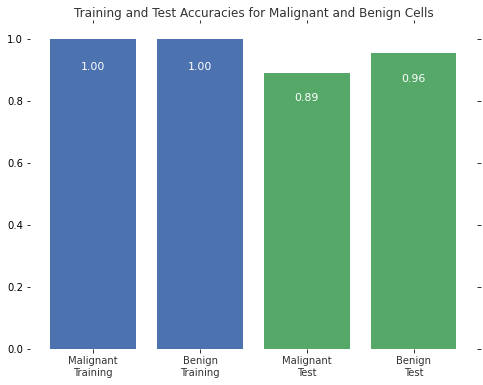

In [37]:
# # Uncomment the call below line to view the visualization
# # Remember to comment the call before submitting the notebook to the autograder

accuracy_plot(answer_five())

### Question 9. Hyper-parameter Tuning (5 pts)

It's common to experiment with different configurations of a model, also known as "hyper-parameters" which are typically specified in advance of starting the step of estimating the learnable "parameters" of a specific model configuration in order to achieve better performance. The main crucial hyper-parameter of a k-NN model is the number $k$, the number of neighbors to examine. 

Change $k$ to 15 and fit the model with training data. Complete the function below to return the trained model, which is a `sklearn.neighbors.KNeighborsClassifier` object. Compare this with the results above for $k$ = 1.

In [38]:
from sklearn.neighbors import KNeighborsClassifier


def answer_nine():
    knn = None
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors = 15)
    knn.fit(X_train, y_train)


    # YOUR CODE HERE
    #raise NotImplementedError()

    return knn

In [39]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

answer_nine()

KNeighborsClassifier(n_neighbors=15)

In [40]:
# Autograder tests

stu_ans = answer_nine()

assert isinstance(
    stu_ans, KNeighborsClassifier
), "Q9: Please build the required kNN classifier."

assert (
    len(stu_ans.classes_) == 2
), "Q9: Your kNN classifier was trained with an incorrect # classes. "

del stu_ans

In [41]:
# # Uncomment the call below line to view the visualization
# # Remember to comment the call before submitting the notebook to the autograder

# accuracy_plot(answer_nine())

### Question 10. Weighted k-NN (5 pts)

Keeping $k = 15$, now change the k-NN method to use a *weighted* distance measure: this means closer neighbors of a query point will have more influence on the prediction than neighbors which are a greater distance away. (Normally, the default k-NN classifier uses a uniform weighting, i.e. it ignores how far a neighbor is and just sees that it exists.)

Your function below should return a trained kNN classifier of the type `sklearn.neighbors.KNeighborsClassifier`. (You may find it helpful to plot and compare the results with the unweighted distance measure, using the provided plotting function.)

In [42]:
def answer_ten():
    knn = None
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors = 15,weights='distance')
    knn.fit(X_train, y_train)

    # YOUR CODE HERE
    # raise NotImplementedError()

    return knn

In [43]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

# answer_ten()

In [44]:
# Autograder tests

stu_ans = answer_ten()

assert isinstance(
    stu_ans, KNeighborsClassifier
), "Q9: Please build the required kNN classifier."

assert (
    len(stu_ans.classes_) == 2
), "Q9: Your kNN classifier was trained with an incorrect # classes. "

del stu_ans

In [45]:
# # Uncomment the call below line to view the visualization
# # Remember to comment the call before submitting the notebook to the autograder

# accuracy_plot(answer_ten())

### Question 11: Model parameter tuning (15 points)

It is important to improve algorithm design through automatically changing the parameter based on data-driven evidence, because it is more effective than just 'trying out' different parameters by hand.

Perform a simple parameter sweep for all **odd** values of $k$ from 1 to 19 inclusive, and return the optimal value of $k$ that leads to the highest overall *test set accuracy* on this train/test split.  Accuracy is computed using the **score** method. Your code should return an integer between 1 and 19. In case of a tie, return the smallest best $k$.

In [46]:
def answer_eleven():
    k_best = None

    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = answer_four()
    scores = []
    k = range(1,19+1,2)
    for i in k :
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    #k_best = int(np.argsort([-i for i in scores])[0])
    k_best = k[int(np.argsort(scores)[-1])]
    #raise NotImplementedError()

    return k_best

In [47]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

# answer_eleven()

In [48]:
# Autograder tests

stu_ans = answer_eleven()

assert isinstance(stu_ans, int), "Q11: Your function should return an integer. "

del stu_ans

### Question 12: Overfitting  (15 points)

A key sign of overfitting is obtaining a training set accuracy that is extremely high (or even perfect), but a test set accuracy that is considerably lower. It is tempting to use a classifier that does so well on the training data it was given, but reality sets in when we try to use this overfit classifier on new test data and we discover it does not in fact generalize well.

Using the same set of possible k-NN classifiers and values of $k$ as the previous question (Q11), look for a scenario where overfitting is likely to be happening, by finding the optimal value for $k$ if your goal was to pick the classifier that did best only on the **training set**.  Compute what the resulting test set accuracy would have been, if you had picked that training-set-based value for $k$.

Your function should return an (`int`, `float`, `float`) tuple, as follows:

`tuple[0]`: the optimal value of $k$ that maximizes *training set* accuracy

`tuple[1]`: the corresponding *training set* accuracy for that optimal $k$

`tuple[2]`: the corresponding *test set* accuracy that you would have received *if* you had used that optimal $k$.

(It is instructive to compare this test set accuracy with the best one you were able to achieve in question 11.)

In [49]:
def answer_twelve():
    k_best = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    X_train, X_test, y_train, y_test = answer_four()
    train_scores = []
    test_scores = []
    k = range(1,19+1,2)
    for i in k :
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))
    #k_best = int(np.argsort([-i for i in scores])[0])
    k_best = k[int(np.argsort(train_scores)[-1])], train_scores[int(np.argsort(train_scores)[-1])], test_scores[int(np.argsort(train_scores)[-1])]

    return k_best

In [50]:
# # use this cell to explore your solution
# # remember to comment the function call before submitting the notebook

# answer_twelve()

In [51]:
# Autograder tests

stu_ans = answer_twelve()

assert isinstance(stu_ans, tuple), "Q12: Your function should return a tuple. "
assert len(stu_ans) == 3, "Q12: The length of your returned tuple should be 3. "
assert isinstance(
    stu_ans[0], int
), "Q12: Your tuple format should be (*int*, float, float). "
assert isinstance(
    stu_ans[1], float
), "Q12: Your tuple format should be (int, *float*, float). "
assert isinstance(
    stu_ans[1], float
), "Q12: Your tuple format should be (int, float, *float*). "


del stu_ans